<a href="https://colab.research.google.com/github/rmonterof/Scikit-learn/blob/main/1_8_Regresi%C3%B3n_m%C3%BAltiple_duke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión múltiple

Ejemplo de preprocesado y regresión tanto simple como múltiple con scikitlearn y statsmodels

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler, OneHotEncoder
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

In [5]:
df = pd.read_csv('/content/duke-forest.csv')
df.head()

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.0,6040,Single Family,1972,"Other, Gas",central,0 spaces,0.97,NaN,https://www.zillow.com/homedetails/1-Learned-P...
1,"1616 Pinecrest Rd, Durham, NC 27705",1030000,5,4.0,4475,Single Family,1969,"Forced air, Gas",central,"Carport, Covered",1.38,NaN,https://www.zillow.com/homedetails/1616-Pinecr...
2,"2418 Wrightwood Ave, Durham, NC 27705",420000,2,3.0,1745,Single Family,1959,"Forced air, Gas",central,"Garage - Attached, Covered",0.51,NaN,https://www.zillow.com/homedetails/2418-Wright...
3,"2527 Sevier St, Durham, NC 27705",680000,4,3.0,2091,Single Family,1961,"Heat pump, Other, Electric, Gas",central,"Carport, Covered",0.84,NaN,https://www.zillow.com/homedetails/2527-Sevier...
4,"2218 Myers St, Durham, NC 27707",428500,4,3.0,1772,Single Family,2020,"Forced air, Gas",central,0 spaces,0.16,NaN,https://www.zillow.com/homedetails/2218-Myers-...


## Data Preparation

In [6]:
# drop column with too many missing values
df = df.drop(['hoa'], axis=1)

In [7]:
# drop remaining row with one missing value
df = df.dropna()

In [8]:
# Drop irrelevant features
df = df.drop(['url', 'address'], axis=1)

In [9]:
# Convert data types
categorical_list = ['type', 'heating', 'cooling', 'parking']

In [10]:
for i in categorical_list:
    df[i] = df[i].astype("category")

In [11]:
# drop irrelavant columns
df = df.drop(['type', 'heating', 'parking'], axis=1)

## Data preprocessing pipeline

In [12]:
# for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [13]:
# for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [14]:
# Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
])

## Regresión simple

<Axes: >

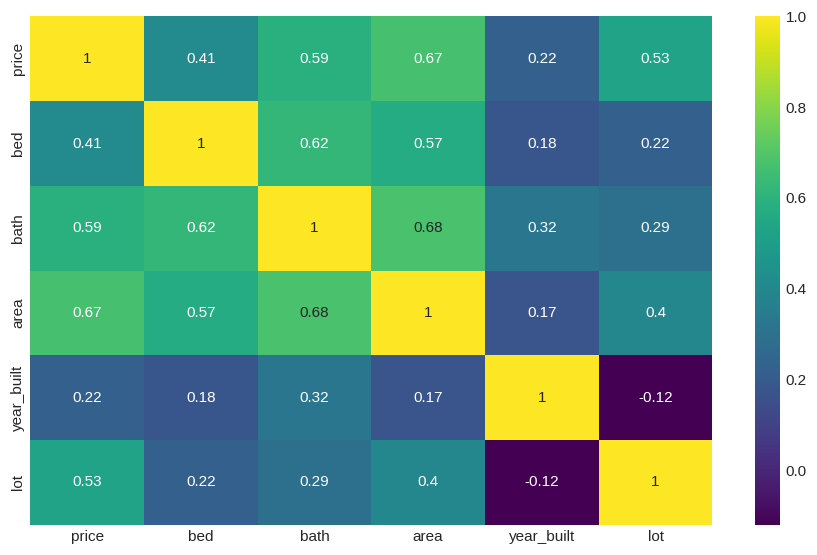

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True).round(2),cmap='viridis',annot=True)

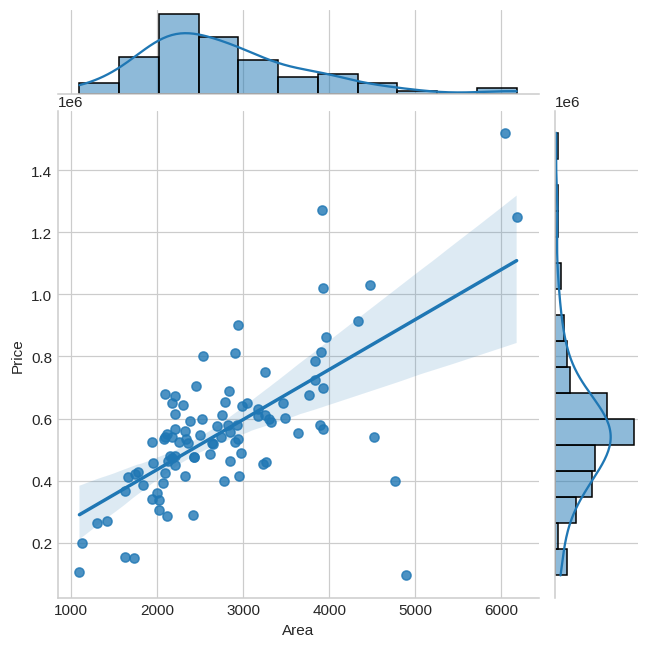

In [16]:
g = sns.jointplot(x='area', y='price', data=df, kind='reg')
# g.fig.set_size_inches(8, 8)
g.set_axis_labels("Area", "Price")
plt.show()

In [84]:
# Select features for simple regression
features = ['area']
X = df[features]

# Create response
y = df["price"]

In [18]:
# check feature
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 97
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    97 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [19]:
# check label
y

,price
0,1520000
1,1030000
2,420000
3,680000
4,428500
...,...
93,541000
94,473000
95,490000
96,815000


In [20]:
# check for missing values
print("Missing values X:", X.isnull().any(axis=1).sum())

print("Missing values Y:", y.isnull().sum())

Missing values X: 0
Missing values Y: 0


## Data splitting

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [86]:
# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
])

In [87]:
set_config(display="diagram")
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eec4d9c9fa0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eec4d818ef0>)])),
                ('lm', LinearRegression())])

In [24]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([128046.72300033])

## Evaluation with training data

In [25]:
X_train.head()

,area
49,2902
71,2165
69,1094
15,2750
39,2334


In [74]:
y_pred = lm_pipe.predict(X_train)

In [27]:
r2_score(y_train, y_pred)

0.35694914972541525

In [28]:
mean_squared_error(y_train, y_pred)

29537647395.092514

In [66]:
np.sqrt(mean_squared_error(y_train, y_pred))

np.float64(137782.56237525766)

In [67]:
mean_absolute_error(y_train, y_pred)

98657.40345173859

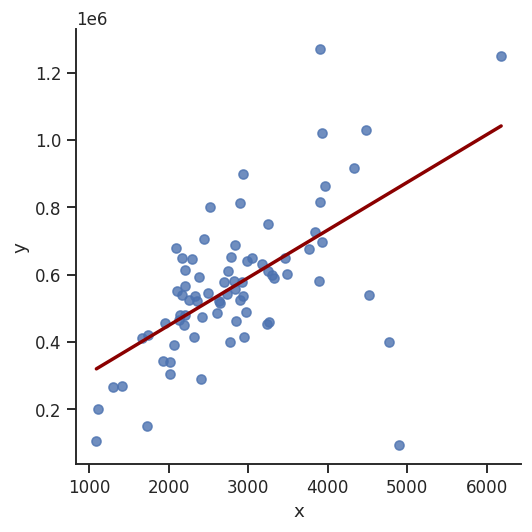

In [68]:
df_train = pd.DataFrame({'x': X_train['area'], 'y': y_train})
sns.lmplot(x='x', y='y', data=df_train, line_kws={'color': 'darkred'}, ci=False);

In [70]:
# ! pip install plotly

In [71]:
import plotly.io as pio
import plotly.offline as py
import plotly.express as px

In [72]:
# Plot with Plotly Express
fig = px.scatter(x=X_train['area'], y=y_train, opacity=0.65,
                 trendline='ols',
                 trendline_color_override='darkred')

fig.show()

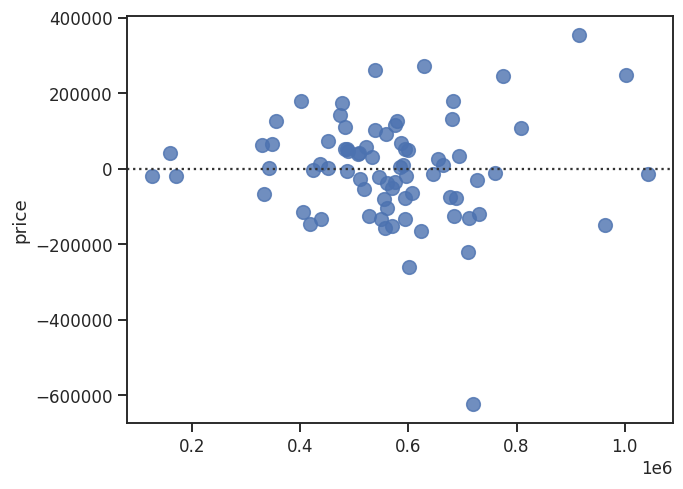

In [75]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80});

In [76]:
# create dataframe
df_error = pd.DataFrame(
    {"y": y_train,
     "y_pred": y_pred,
     "error": y_pred - y_train
     })

# sort by error, select top 10 and get index
error_index = df_error.sort_values(by=['error']).nlargest(10, 'error').index

# show corresponding data observations
df.iloc[error_index]

,price,bed,bath,area,year_built,cooling,lot
65,609000,5,4.0,3175,2016,other,0.47
50,339000,3,2.0,2016,1962,other,1.10
96,815000,4,4.0,3904,1970,other,1.47
92,590000,5,3.0,3323,1980,other,0.43
57,400000,4,3.0,2771,1958,central,0.52
48,416000,5,3.0,2949,1955,other,0.55
97,674500,4,4.0,3766,1955,other,0.73
20,270000,3,3.0,1416,1990,other,0.36
33,415000,4,3.0,2317,1955,central,0.56
28,305000,4,3.0,2015,1955,central,0.28


## Evaluation with test data

In [79]:
y_pred = lm_pipe.predict(X_test)

In [80]:
print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 35732451704.64754
RMSE: 189030.29308723917


In [83]:
# Plot with Plotly Express
fig = px.scatter(x=X_test['area'], y=y_test, opacity=0.65,
                trendline='ols', trendline_color_override='darkred')

fig.show()

In [88]:
# Model generalization on unseen data
import plotly.graph_objects as go

x_range = pd.DataFrame({ 'area': np.linspace(X_train['area'].min(), X_train['area'].max(), 100)})
y_range =  lm_pipe.predict(x_range)

go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range.area, y=y_range, name='prediction')
])

## Multiple regression

In [31]:
# Select features for multiple regression
features= [
    'bed',
    'bath',
    'area',
    'year_built',
    'cooling',
    'lot'
]
X = df[features]

X.info()
print("Missing values:",X.isnull().any(axis = 1).sum())

# Create response
y = df["price"]

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 97
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   bed         97 non-null     int64   
 1   bath        97 non-null     float64 
 2   area        97 non-null     int64   
 3   year_built  97 non-null     int64   
 4   cooling     97 non-null     category
 5   lot         97 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 4.8 KB
Missing values: 0


In [32]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
])

In [34]:
# show pipeline
set_config(display="diagram")
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eec4d9c9fa0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eec4d818ef0>)])),
                ('lm', LinearRegression())])

In [35]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([ 37501.22436002,  50280.7007969 ,  30312.97805437,  27994.3520344 ,
        79024.39994917,  23467.73502737, -23467.73502737])

In [36]:
y_pred = lm_pipe.predict(X_test)

In [37]:
r2_score(y_test, y_pred)

0.48258367314488015

In [38]:
mean_absolute_error(y_test, y_pred)

127809.89024844233

## Statsmodels

In [39]:
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse

In [40]:
# data spliting
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [41]:
# Fit Model
lm = smf.ols(formula='price ~ area', data=train_dataset).fit()

In [42]:
# Short summary
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.593e+04,6.21e+04,1.383,0.171,-3.78e+04,2.1e+05
area,167.7007,20.741,8.085,0.000,126.391,209.010


In [43]:
# Full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     65.37
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           7.56e-12
Time:                        18:29:39   Log-Likelihood:                -1053.3
No. Observations:                  78   AIC:                             2111.
Df Residuals:                      76   BIC:                             2115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.593e+04   6.21e+04      1.383      0.171   -3.78e+04     2.1e+05
area         167.7007     20.741      8.085      0.000     126.391     209.010
==============================================================================
Omnibus:                       26.589   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.927
Skew:                          -0.862   Prob(JB):                     3.66e-24
Kurtosis:                       8.499   Cond. No.                     9.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Adjusted R squared
lm.rsquared_adj

np.float64(0.4553434818683253)

In [45]:
# R squared
lm.rsquared

np.float64(0.4624169431427626)

In [46]:
# AIC
lm.aic

np.float64(2110.625966301898)

In [47]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 26 to 73
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   price       78 non-null     int64   
 1   bed         78 non-null     int64   
 2   bath        78 non-null     float64 
 3   area        78 non-null     int64   
 4   year_built  78 non-null     int64   
 5   cooling     78 non-null     category
 6   lot         78 non-null     float64 
dtypes: category(1), float64(2), int64(4)
memory usage: 4.5 KB


In [48]:
# Add the regression predictions (as "pred") to our DataFrame
train_dataset['y_pred'] = lm.predict()

In [49]:
# MSE
mse(train_dataset['price'], train_dataset['y_pred'])

np.float64(31402336646.61913)

In [50]:
# RMSE
rmse(train_dataset['price'], train_dataset['y_pred'])

np.float64(177207.04457390832)

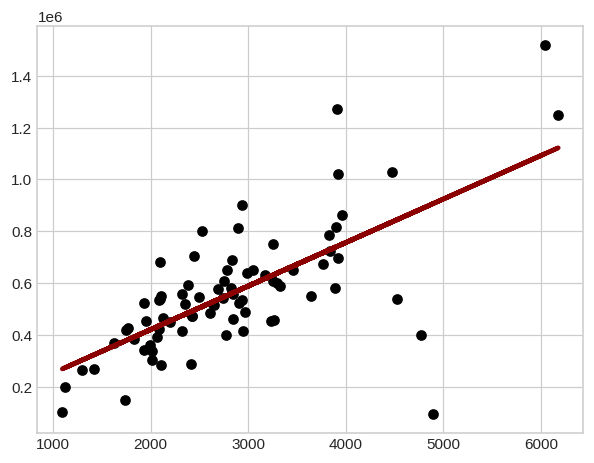

In [51]:
# Plot regression line
plt.scatter(train_dataset['area'], train_dataset['price'],  color='black')
plt.plot(train_dataset['area'], train_dataset['y_pred'], color='darkred', linewidth=3);

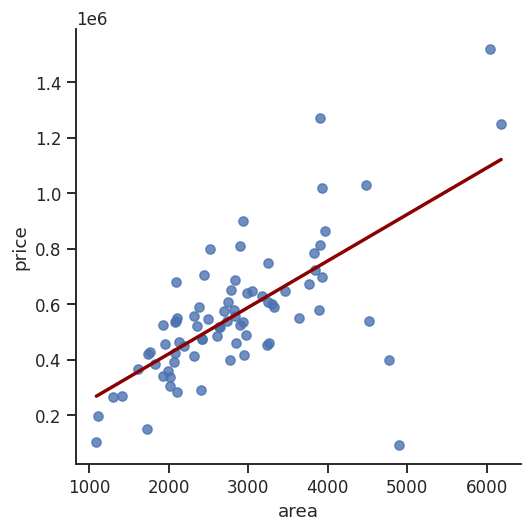

In [52]:
sns.set_theme(style="ticks")

sns.lmplot(x='area', y='price', data=train_dataset, line_kws={'color': 'darkred'}, ci=False);

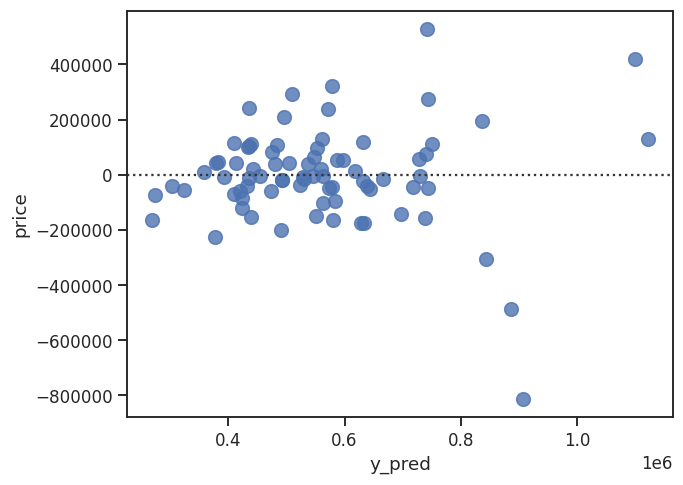

In [53]:
sns.residplot(x="y_pred", y="price", data=train_dataset, scatter_kws={"s": 80});

In [54]:
# Add regression predictions for the test set (as "pred_test") to our DataFrame
test_dataset['y_pred'] = lm.predict(test_dataset['area'])

In [55]:
test_dataset.head()

,price,bed,bath,area,year_built,cooling,lot,y_pred
9,650000,3,2.0,2173,1964,other,0.73,450348.456333
12,671500,3,3.0,2200,1964,central,0.51,454876.375736
21,645000,4,4.0,2300,1969,central,0.47,471646.447601
25,603000,4,4.0,3487,1965,central,0.61,670707.200633
36,615000,3,3.0,2203,1954,other,0.63,455379.477892


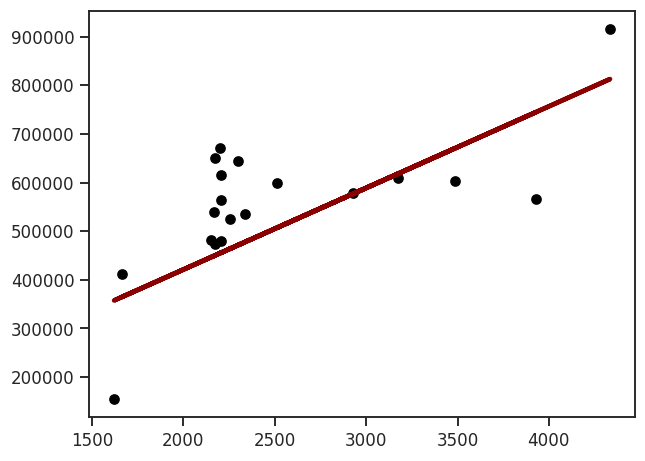

In [56]:
# Plot regression line
plt.scatter(test_dataset['area'], test_dataset['price'],  color='black')
plt.plot(test_dataset['area'], test_dataset['y_pred'], color='darkred', linewidth=3);

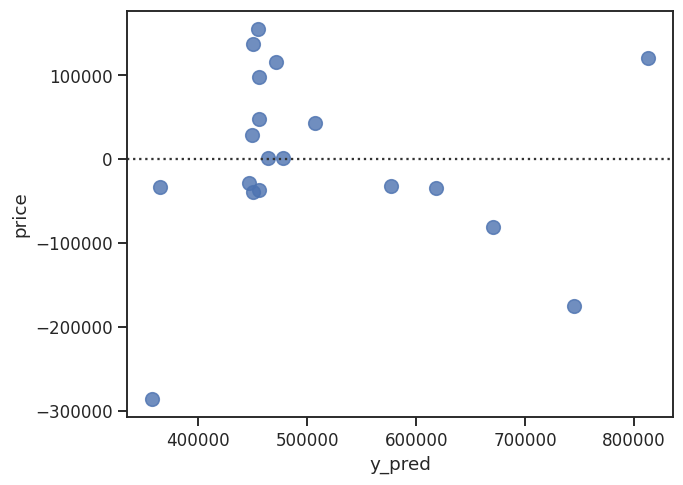

In [57]:
sns.residplot(x="y_pred", y="price", data=test_dataset, scatter_kws={"s": 80});

In [58]:
# RMSE
rmse(test_dataset['price'], test_dataset['y_pred'])

np.float64(119345.88525637302)

### Regresión múltiple

In [59]:
lm_m = smf.ols(formula='price ~ area + bed + bath + year_built + cooling + lot', data=train_dataset).fit()

In [60]:
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     19.83
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.86e-13
Time:                        18:31:19   Log-Likelihood:                -1039.1
No. Observations:                  78   AIC:                             2092.
Df Residuals:                      71   BIC:                             2109.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.944e+06   2.26e+06     -1.302      0.197   -7.45e+06    1.56e+06
cooling[T.other] -1.021e+05   3.67e+04     -2.778      0.007   -1.75e+05   -2.88e+04
area               111.8295     25.915      4.315      0.000      60.156     163.503
bed               5121.5208    3.1e+04      0.165      0.869   -5.68e+04     6.7e+04
bath              2.678e+04   2.94e+04      0.910      0.366   -3.19e+04    8.55e+04
year_built        1491.1176   1157.430      1.288      0.202    -816.732    3798.968
lot               3.491e+05   8.53e+04      4.094      0.000    1.79e+05    5.19e+05
==============================================================================
Omnibus:                       27.108   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.999
Skew:                          -0.874   Prob(JB):                     2.90e-25
Kurtosis:                       8.632   Cond. No.                     4.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""